In [35]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist
import tensorflow





In [36]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [37]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow

In [38]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train/255
x_test2=x_test
x_test=x_test/255

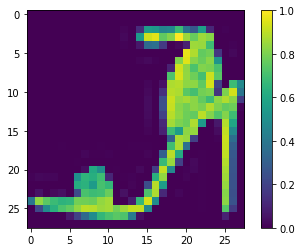

In [39]:
plt.figure()
plt.imshow(x_train[47482])
plt.colorbar()
plt.grid(False)

In [40]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation="relu"),
                        keras.layers.Dense(10,activation="softmax")
])

In [41]:
model.compile(optimizer=tensorflow.keras.optimizers.SGD(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.9043
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2692 - accuracy: 0.9035
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9061
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2641 - accuracy: 0.9058
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9076
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9073
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2579 - accuracy: 0.9078
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9092
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2534 - accuracy: 0.9106
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [53]:
test_loss,test_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8836


In [54]:
predictions=model.predict(x_test)

In [46]:
class_names = {0:'Футболка / топ', 1:"Шорты", 2:"Свитер", 3:"Платье",
               4:"Плащ", 5:"Сандали", 6:"Рубашка", 7:"Кроссовок", 8:"Сумка",
               9:"Ботинок"}

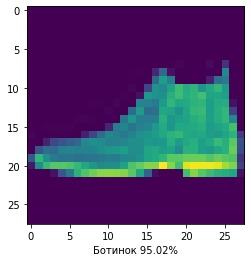

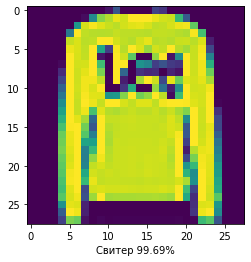

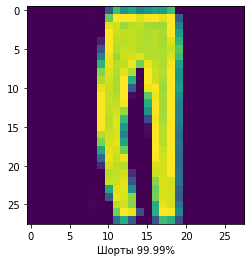

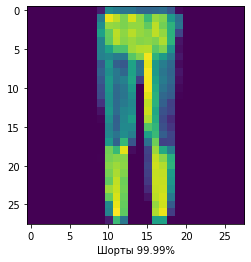

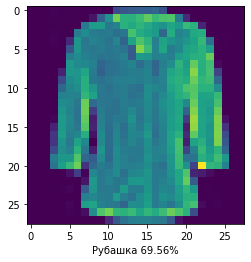

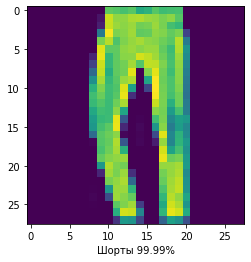

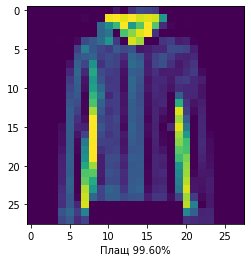

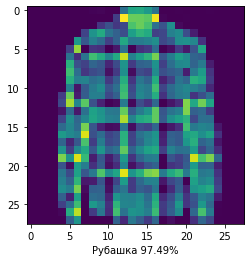

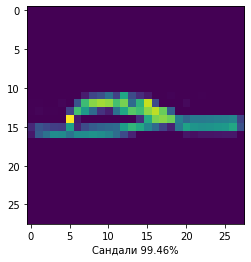

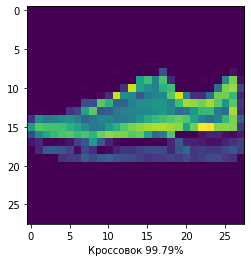

In [55]:
for i in range(10):
    name=class_names[np.argmax(predictions[i])]
    chance=" "+str(predictions[i][np.argmax(predictions[i])]*100)[0:5]+"%"
    plt.figure()
    plt.imshow(x_test[i])
    plt.xlabel(name+chance)
    plt.show()